In [1]:
!pip install fastparquet
!pip install import-ipynb

In [0]:
source_path_file = '/content/drive/My Drive/Colab Notebooks/Works/functions.ipynb'
source_path_file = source_path_file.replace(' ', '\\ ')

!cp $source_path_file '/content'

#to sync if any changes done in parent file
#!rsync -aP $source_path_file '/content/functions.ipynb'

#to remove the files from colab env
#!rm -rf '/content/functions.ipynb'

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import import_ipynb
from zipfile import ZipFile
import pandas as pd
import functions as fn
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score, accuracy_score
from time import time
from sklearn.metrics import confusion_matrix
import fastparquet

from scipy.stats import kurtosis, skew
from sklearn.preprocessing import MinMaxScaler

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [0]:
#reading the final features file
final_data = pd.read_parquet('/content/drive/My Drive/Colab Notebooks/Works/Finding donors for charity/final_data_don.parquet.gzip', engine = 'fastparquet')

income = final_data['income'] # output variable
features_final = final_data.iloc[:,0:-1] # final features

In [0]:
features_final.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_level_ 10th,education_level_ 11th,education_level_ 12th,education_level_ 1st-4th,education_level_ 5th-6th,education_level_ 7th-8th,education_level_ 9th,education_level_ Assoc-acdm,education_level_ Assoc-voc,education_level_ Bachelors,education_level_ Doctorate,education_level_ HS-grad,education_level_ Masters,education_level_ Preschool,education_level_ Prof-school,education_level_ Some-college,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,...,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,0.667492,0.0,0.397959,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.000000,0.0,0.122449,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.000000,0.0,0.397959,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,0.000000,0.0,0.397959,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0.000000,0.0,0.397959,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
features_final.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_level_ 10th,education_level_ 11th,education_level_ 12th,education_level_ 1st-4th,education_level_ 5th-6th,education_level_ 7th-8th,education_level_ 9th,education_level_ Assoc-acdm,education_level_ Assoc-voc,education_level_ Bachelors,education_level_ Doctorate,education_level_ HS-grad,education_level_ Masters,education_level_ Preschool,education_level_ Prof-school,education_level_ Some-college,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,...,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,0.667492,0.0,0.397959,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.000000,0.0,0.122449,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.000000,0.0,0.397959,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,0.000000,0.0,0.397959,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0.000000,0.0,0.397959,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**<h1> Shuffle and Split the Data**

* Now all the categorical features have been converted into numerical features and all the numerical features are normalized.
* As the next step we'll split the data (both features and their labels) into training and test sets.
* 80% of the data will be used for training and 20% for testing.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(features_final,
                                                    income,
                                                    test_size=0.2,
                                                    random_state=0)

#show count of samples
print('Training set has {} samples.'.format(X_train.shape[0]))
print('Testing set has {} samples.'.format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


**<h1>Evaluating Model Performance**

* In this section, we'll investigate four different algorithms, and determine which is best at modeling the data.
* Three of the algorithms will be supervised learners and the fourth will be '*naive predictor*'.

**<h2>Metrics and the Naive Predictor**

* Dudes who gave this problem already know from their research that individuals that make more than \$50,000 are most likely to donate to their charity.
* Because of this *CharityML* is particularly interested in predicting who make more than \$50,000 accurately.
* It seems so obvious to use **accuracy** as a metric for evaluating a particular model's performance.
* Additionally, identifying someone that doesn't make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are only looking to find individuals willing to donate.
* Therefore, a model's ability to precisely predict those that make more than \$50,000 is more important than the model's ability to **recall** those individuals.
* For this reason we use **F-beta score** as a metric that considers both precision and recall:

> $F_\beta = \left(1+\beta^2\right) * \frac{precision\;*\;recall}{\left(\beta^2\;
*\;precision\right)\;+\;recall}$

* In particular, when $\beta\;=\;0.5$, more emphasis is placed on precision. This is called **F-0.5 score**.
* Looking at the distribution of classes (>\\$50,000: 11208, <= \\$50,000: 34014), it's clear that most individuals do not make more than $50,000.
* This imbalance in classes can greatly affect **accuracy**, since we could simply say 'this person doesn't make more than \$50,000' and generally be right, without ever looking at the data!
* Making such a statement would be called **naive**, since we have not considered any information to  substantiate the claim.
* It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well.
* That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, CharityML would identify no one as donors.

**Recap of accuracy, precision and recall**

* **Accuracy** : $\frac{No.\;of\;correct\;predictions}{Total\;No.\;of\;test\;data\;points}$
<br>

* **Precision** : 
$\frac{True\;Positives}{\left(True\;Positives\;+\;False\;Positives\right)}$<br><br>
What proportion of messages we classified as spam, actually were spam.
<br>

* **recall(sensitivity)**: $\frac{True\;Positives}{\left(True\;Positives\;+\;False\;Negatives\right)}$<br><br>
What proportion of messges that actually were spam were classified by us as spam.
<br>

* **F-beta score** :considers both precision and recall:
<br>
$F_\beta = \left(1+\beta^2\right) * \frac{precision\;*\;recall}{\left(\beta^2\;
*\;precision\right)\;+\;recall}$;  $\quad0\;\leq\;F_\beta\;\leq\;1$<br>
<br>
In particular, when $\beta\;=\;0.5$, more emphasis is placed on precision. This is called F-0.5 score.
<br>
<br>
* **Confustion Matrix**:

$T_{val}\;P_{val}$ | 0| 1
:---:|:---:|:---:
0|TN|FP
1|FN|TP


**<h2>Naive Predictor Performance**

* If we choose a model that always predicted an individual made more than \$50,000, what would that modle's accuracy and F-score be on this dataset?
* The purpose of generating a naive predictor is simply to show what a bsae model without any intelligence would look like.
* In real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are lookin to imporve.
* When there is no benchmark model set, one can choose random model as a base model.

In [18]:
TP = np.sum(income)
# income is the encoded data of 'income_raw'

FP = income.count() - TP
# above is because our naive model is predicting always label '1' so TP becomes
# total no. of 1's in the output label.
# In total all the pts in output variable are predicted as '1'.

TN = 0 # as no value is predicted as '0'
FN = 0

accuracy = (TP + TN)/(TP + FP + TN + FN)
precision = TP/(TP+FP)
recall = TP/(TP+FN)

fscore = (1 + 0.5**2) * ((precision * recall) / ((0.5**2 * precision) + recall))

print('Naive Predictor :\nAccuracy : {:.4f}\nF-score : {:.4f}'.format(accuracy, fscore))


Naive Predictor :
Accuracy : 0.2478
F-score : 0.2917


**<h3>Supervised Learning Models**

Implementing any of the three from below:
* Gaussian Naive Bayes
* Decision Trees
* Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
* K-Nearest Neighbors
* Stochastic Gradient Descent Classifier
* Support Vector Machines
* Logistic Regression

**<h2>Model Application**

We'll ask below questions for each learning model that is appropriate for this problem.
* Describe one real-world application in industry where the model can be applied.
* What are the strengths of the model; when does it perform well?
* What are the weaknesses of the model; when does it perform poorly?
* What makes this model a good candidate for the problem, given what you know about the data?

**<h3>1. Support Vector Machines (Support Vector Classifier)**

* **Application** : Image classification.
* **Strength** :
  * Powerful Kernels
  * Maximum margin classifiers, effective in high dimensional spaces.
  * Have higher accuracy than some of traditional classifiers and not easily influenced by overfitting.
* **Weakness** :
  * Less effective on noiser-larger datasets with overlapping classes.
  * The training time is much longer because it is computationally intensive.
  * Doesn't directly provide probability estimates.
* **Candidacy** :
  * SVMs were chosen because of their effectiveness given high dimensionality. Due to our one-hot encoding feature transformation, we got more than 100 extra features in our dataset, so SVMs should be a classifier that works regardless of that. Also, our dataset is not that large (<100K records) to be deterrent.

**<h3>2.Random Forest Classifier**

* **Application** : Xbox Kinnect, where Random Forest is used for Real time Human Pose Recognition.
* **Strength** :
  * Scale quickly, have ability to deal with unbalanced and missing data.
  * Generates an internal unbiased estimate of generalization error as forest building progress.
  * Provides an experimental way to detect variable interactions.
* **Weakness** :
  * Less effective on noiser-larger datasets with overlapping classes.
  * Large number of trees may lead to slow real-time prediction in some cases.
* **Candidacy** :
  * RandomForests are always a safe bet as they generally have high average accuracy rate for most cases and work well for complex classification tasks as well.

**<h3>3. Gradient Boosting Classifier**

* **Application** :
  * Higgs Boson Discovery from the Large Hadron Collider dataset.
  * Physists can extract signal of Higgs Boson particle from background noises which potentially leading to major breakthroughs in modern physics.
* **Strength** :
  * It builds new trees which complement the already built trees. The new trees which will be built will help to correct errors in the previously built trees. This can produce highly accurate results with less trees.
  * Can handle different types of predictor variables and accommodate missing data.
* **Weakness** :
  * Unable to compute conditional class probabilites.
  * Suffers from long sequential computation times.
  * More parameters to tune.
* **Candidacy** :
  * Since, this model produces good accurate results, this makes it very good candidate for the problem.

**<h2> Implementation - Creating a Training and Predicting Pipeline**

* To properly evaluate the performance of each model you've chosen, it's important that we create a **training and predicting pipeline** that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data.
* Steps to do :
  * Import *`fbeta_score and accuracy_score`* from `skearn.metrics`
  * Fit the learner to the sampled training data and record the training time.
  * Peform predictions on the test data X_test, and also on the first 300 training points X_train[:,300]
    * Record the total prediction time.
  * Calculate the accuracy score for both the training subset and testing set.
  * Calculate the F-score for both the training subset and testing set.
    * Make sure that you set the beta parameter!

In [0]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test):
  results = {}

  #training the model on sampled train set and storing the train time
  start = time()
  learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
  end = time()
  #results['train_time'] = end-start

  #Predicting the output on sampled train and test set and storing the train time
  start = time()
  predictions_test = learner.predict(X_test)
  predictions_train = learner.predict(X_train[:300])
  end = time()
  #results['pred_time'] = end - start

  #storing the accuracy score on train and test sets
  #results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
  #results['acc_test'] = accuracy_score(y_test, predictions_test)

  #storing the fscore score on train and test sets
  #results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
  #results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)

  results['time_for_training'] = end-start
  results['accuracy_train'] = accuracy_score(y_train[:300], predictions_train)
  results['fscore_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
  results['time_for_testing'] = end - start
  results['accuracy_test'] = accuracy_score(y_test, predictions_test)
  results['fscore_test'] = fbeta_score(y_test, predictions_test, beta=0.5)


  #success message
  print('{} trained on {} samples.'.format(learner.__class__.__name__, sample_size))

  return results

**<h2>Implementation: Initial Model Evaluation**

* Implementing the classifiers with the below steps:
  * Import the three chosen supervised learning models.
  * Initialize the thre models and store them in 'clf_A', 'clf_B' and 'clf_C'.
    * Use a 'random_state' for each model you use, if provided.
    * We'll use the default settings for each model and tune the one specific model in later section.
  * Calculate the number of records equal to 1%, 10% and 100% of the training data.
    * Store those values in 'samples_1', 'samples_10' and 'samples_100' respectively.

In [0]:
import functions as fn

In [20]:
clf_A = SVC(random_state=10)
clf_B = RandomForestClassifier(random_state=10)
clf_C = GradientBoostingClassifier(random_state=10)

samples_100 = len(y_train)
samples_10 = len(y_train)//10
samples_1 = len(y_train)//100

results = {}

for clf in [clf_A, clf_B, clf_C]:
  clf_name = clf.__class__.__name__ # to get the classifier class name from library itself
  results[clf_name] = {}
  for i, samples in enumerate([samples_1, samples_10, samples_100]):
    results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

fn.evaluate(results, 3, ['1%', '10%', '100%'])

SVC trained on 361 samples.
SVC trained on 3617 samples.
SVC trained on 36177 samples.
RandomForestClassifier trained on 361 samples.
RandomForestClassifier trained on 3617 samples.
RandomForestClassifier trained on 36177 samples.
GradientBoostingClassifier trained on 361 samples.
GradientBoostingClassifier trained on 3617 samples.
GradientBoostingClassifier trained on 36177 samples.


In [15]:
fn.evaluate(results, 3, ['1%', '10%', '100%'])

In [0]:
results = {'GradientBoostingClassifier': {0: {'acc_test': 0.8304035378662245,
   'acc_train': 0.94,
   'f_test': 0.6574525745257453,
   'f_train': 0.9375,
   'test_time': 0.02888202667236328,
   'train_time': 0.02888202667236328},
  1: {'acc_test': 0.855942509673853,
   'acc_train': 0.8833333333333333,
   'f_test': 0.7216040542029304,
   'f_train': 0.8134920634920635,
   'test_time': 0.029424428939819336,
   'train_time': 0.029424428939819336},
  2: {'acc_test': 0.8630182421227197,
   'acc_train': 0.8566666666666667,
   'f_test': 0.7395338561802719,
   'f_train': 0.7341269841269841,
   'test_time': 0.02919745445251465,
   'train_time': 0.02919745445251465}},
 'RandomForestClassifier': {0: {'acc_test': 0.8170259812050856,
   'acc_train': 1.0,
   'f_test': 0.6246450880181714,
   'f_train': 1.0,
   'test_time': 0.12092161178588867,
   'train_time': 0.12092161178588867},
  1: {'acc_test': 0.8389165284687673,
   'acc_train': 1.0,
   'f_test': 0.6759134665148535,
   'f_train': 1.0,
   'test_time': 0.18941831588745117,
   'train_time': 0.18941831588745117},
  2: {'acc_test': 0.8420121614151465,
   'acc_train': 0.9833333333333333,
   'f_test': 0.6801885865828503,
   'f_train': 0.9770114942528737,
   'test_time': 0.32848024368286133,
   'train_time': 0.32848024368286133}},
 'SVC': {0: {'acc_test': 0.8180210060807076,
   'acc_train': 0.8533333333333334,
   'f_test': 0.6277580071174378,
   'f_train': 0.732758620689655,
   'test_time': 0.32559871673583984,
   'train_time': 0.32559871673583984},
  1: {'acc_test': 0.8316196793808734,
   'acc_train': 0.86,
   'f_test': 0.662986635676932,
   'f_train': 0.7352941176470589,
   'test_time': 2.3960485458374023,
   'train_time': 2.3960485458374023},
  2: {'acc_test': 0.8423438363736871,
   'acc_train': 0.8533333333333334,
   'f_test': 0.685054319164645,
   'f_train': 0.7169117647058826,
   'test_time': 22.55567479133606,
   'train_time': 22.55567479133606}}}

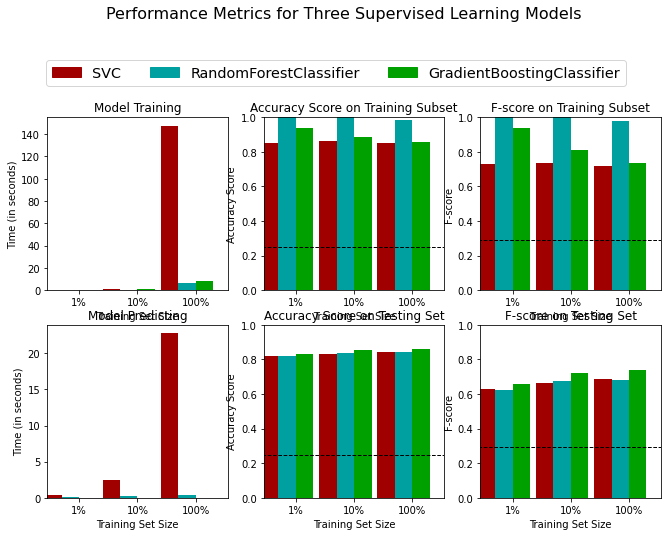

In [0]:
evaluate(results, accuracy, fscore)

**<h2>Improving the Results**

* In this final section, we'll choose from the three supervised learning models the *best model* to user on the dataset.
* We'll perform grid search optimization for the model over the entire training set (X_train and y_train) by tuning at least one parameter to improve upon the untuned model's F-score.

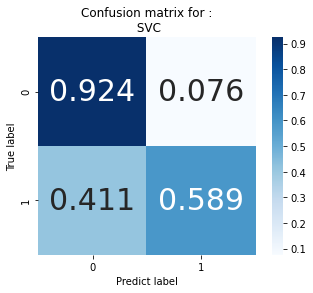

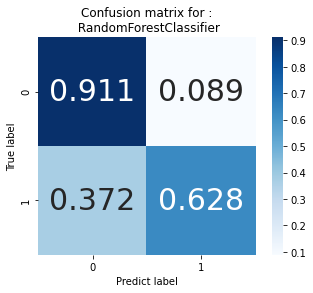

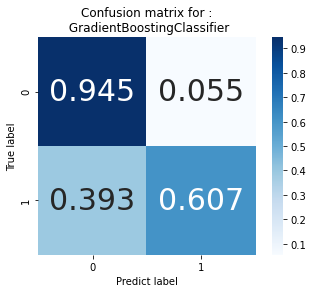

In [0]:
for i, model in enumerate([clf_A, clf_B, clf_C]):
  cm = confusion_matrix(y_test, model.predict(X_test))
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #normalizing the data

  #view the heat map
  plt.figure(i)
  sns.heatmap(cm, annot=True, annot_kws={'size':30}, cmap='Blues', square = True, fmt='.3f')
  plt.ylabel('True label')
  plt.xlabel('Predict label')
  plt.title('Confusion matrix for :\n {}'.format(model.__class__.__name__))

In [9]:
del fn

NameError: ignored

In [0]:
source_path_file = '/content/drive/My Drive/Colab Notebooks/Works/functions.ipynb'
source_path_file = source_path_file.replace(' ', '\\ ')

!cp $source_path_file '/content'

#to sync if any changes done in parent file
#!rsync -aP $source_path_file '/content/functions.ipynb'

#to remove the files from colab env
#!rm -rf '/content/functions.ipynb'

In [6]:
!rsync -aP $source_path_file '/content/functions.ipynb'

sending incremental file list
functions.ipynb
         27,375 100%    0.00kB/s    0:00:00 (xfr#1, to-chk=0/1)


In [8]:
import functions as fn

ModuleNotFoundError: ignored

In [0]:
from inspect import getmembers, isfunction

In [13]:
print ([o for o in getmembers(fn) if isfunction(o[1])])

[('confusion_matrix', <function confusion_matrix at 0x7f96f1bc26a8>), ('distribution', <function distribution at 0x7f96ee7bef28>), ('evaluate', <function evaluate at 0x7f96ee7e2a60>), ('feat_imp_plot', <function feat_imp_plot at 0x7f96ee7cfea0>), ('flatten', <function flatten at 0x7f96ee7e3d90>), ('get_ipython', <function get_ipython at 0x7f9720a218c8>), ('make_subplots', <function make_subplots at 0x7f96f38d3620>), ('plot_confusion_matrix', <function plot_confusion_matrix at 0x7f96ee7cf8c8>)]


In [0]:
for i, model in enumerate([clf_A, clf_B, clf_C]):
  fnc.plot_confusion_matrix(y_test, model.predict(X_test),'Confusion matrix for :\n {}'.format(model.__class__.__name__))

NameError: ignored

**<h3>Choosing the best Model**

Look at the graphs of above and check the F-score for the testing set when 100% of the training set is used and answer the below for each model and decide which is the best model.
  * Metrics - F score on the testing when 100% of the training data is used
  * Prediction/training time
  * The algorithm's suitability for the data

Looking at the above results, out of the three models found **GradientBoostingClassifier** is the most appropriate for our task. Reasons are:
  * **Accuracy Score**: From the above bar graphs we can see middle bar random forest has the highest accuracy accross all sizes of training set but GradientBoosting beats it with a slight marging accross all sizes of test set, achieving the highest accuracy score.
  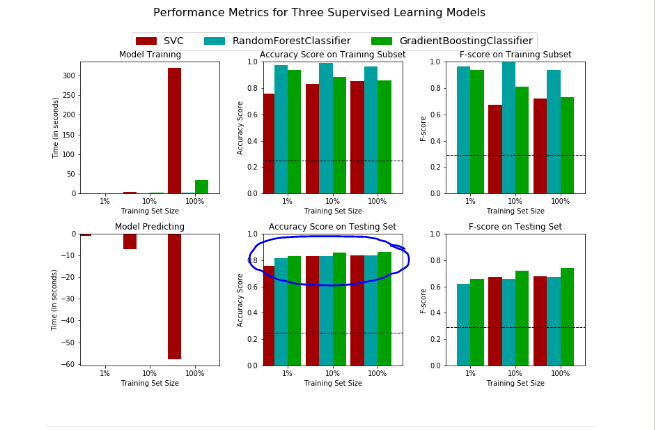
  * **Time**: Here we can see that Gradient boosting takes relatively more time than Random Forest and too less time than SVM while training the model but it takes the least amount of time in case of predicting.
  * **F Score**: Again here Random Forest does better on training data than both the models, but Gradient Boosting has a higher score on the testing set.
<br>

Finally, **we can conclude that both Random Forest and GradientBoosting are effective algorithms but Gradient Boosting is a clear winner here as it performs quite well on test sets with respect to prediction time, Fscore and Accuracy score.**

**<h3>Describing the Model in Layman's Terms**

Now we'll discuss how the final model chosen is supposed to work and describe the major qualities of the model, such as how the model is trained and how the model makes a prediction by avoiding mathematical jargons.
<br>
To understand gradient boosting we must first understand two important aspects of it: 1. Decision Trees 2. Boosting
1. **Decision Trees:**
  * This is basically defined as a decision support tool that uses tree like structure/model of decisions and their possible consequences.
  * Here each node of tree is a 'test', each branch is outcome of this test and each leaf represents a class label which we are trying to predict.
  * So, by answering certain set questions one by one realting to the system we end up with potentially correct or incorrect answers
  * The strategy here is that the first set of questions have to be broad in order to eliminate multiple outcomes and the last few questions have to be very specific to get the correct outcomes.
  * Finally, we end with a big tree which has all the possible outcomes of all decisions and can be used to predict future outcomes.

2. **Boosting:**
  * This is best explained by an example of a factory worker, who is working in an assembly line and is trained to perform a specific task.
  * He/she performs well on in their local and very specific tasks but overall they can't do much and are quite weak for other tasks, but if we combine multiple workers each having different expertise/skills and make them work on their individual tasks, we end up making the final product efficiently.
  * This is the basic idea behind boosting, here we bundle up multiple classifiers and make a final model which works accurately in predicting accross all areas of the dataset in question.
<br>

*Now, what Gradient Boosting actually does is quite smart, it makes small and weak decision trees and checks how many outcomes it has misclassified, then it builds another tree which helps to correct the errors made by previous tree by changing some parameters. This process keeps going on sequentially untill we have reached a certain threshold of acceptable error rate and we end up with a single tree which is basically a combination of small weak decision trees. This final tree is more expressive and can address multiple areas efficiently.*

**<h2>Implementatin: Model Tuning**

* In this section we'll fine tune the chosen model.
* Using grid search with at least one important parameter tuned with at least 3 different values. We'll do this search on the entire training set. Steps are given below:
  * Import gridsearchcv and make_scorer
  * Initialize the classifier you've chosen and store it in clf
    * Set a random_state if one is available to the same state you set before.
  * Create a dictionary of parameters you wish to tune for the chosen model.
    * Example: parameters = {'parameter' : [list of values]}
    * Avoid tuning the max_features parameter of the learner if that's available.
  * Use make_scorer to create a fbeta_score scoring object (with $\beta\;=\;0.5$).
  * Perform grid search on the classifier clf using the 'scorer', and store it in grid_obj.
  * Fit the grid search object to the training data (X_train, y_train), and store it in grid_fit.

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score, fbeta_score

clf = GradientBoostingClassifier(random_state=10)
#here random_state is used as same number as we used in previous classification to get
# the same randomness to compare the results.

parameters = {'max_depth':[3,5,7],
              'n_estimators': [25, 50, 150],
              'min_samples_split' : [3,4,5]
              }

#scorer function to declare metrics
scorer = make_scorer(fbeta_score, beta=0.5)

#declaring Gridsearchcv with necessary parameters
grid_obj = GridSearchCV(clf, parameters, scoring = scorer, n_jobs=10)

#fitting the gridsearchcv on dataset
grid_fit = grid_obj.fit(X_train, y_train)

#getting the best estimator
best_clf = grid_fit.best_estimator_

#make predictions using the unoptimized model
predictions = (clf.fit(X_train, y_train)).predict(X_test)

#make predictions from best model
best_predictions = best_clf.predict(X_test)

print('Unoptimized model\n-----------')
print('Accuracy score on testing data : {:.4f}'.format(fbeta_score(y_test, predictions, beta=0.5)))
print('F-score on testing data : {:.4f}'.format(fbeta_score(y_test, predictions, beta=0.5)))

print('\nOptimized Model\n----------')
print('Final acccuracy score on the testing data : {:.4f}'.format(accuracy_score(y_test, best_predictions)))
print('Final F-score on the testing data : {:.4f}'.format(fbeta_score(y_test, best_predictions, beta=0.5)))

Unoptimized model
-----------
Accuracy score on testing data : 0.7395
F-score on testing data : 0.7395

Optimized Model
----------
Final acccuracy score on the testing data : 0.8695
Final F-score on the testing data : 0.7488


**<h3> Final Model Evaluation**

* Now that optimized model is formed and we are going to ask the below questions on the output of optimized model.
 * Are these scores better or worse than the unoptimized model?
 * How do these results compared to the naive predictor benchmarks found earlier?
<br>

**Results**

Metric|Naive model|Unoptimized Model|Optimized Model
:---:|:---:|:---:|:---:
Accuracy Score|0.2478|0.7395|0.8695
F-score|0.2917|0.7395|0.7488

* The Optimized model's Accuracy Score is 0.8695 and F1-score is 0.7488.
* The optimized models' scores are slightly better than the unoptimized model's scores.
* Comparing the naive predictor's scores, we can say that, F-score increased from 0.2917 to 0.7488 and Accuracy increased from 0.2478 to 0.8695. So our model is performing better a lot.

**<h2>Feature Importance**

* An important task when performing supervised learning on a dataset is determining which features provide the most predictive power.
* As we have more than 100 features, we'll focuss on the realtionship between only a few crucial features and the target label.
* In this case of the project, we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.
* Important is we can identify most important features using many methods, but we follow using model's implict functions and we use those models that has this functionality like adaboost, random forest, etc.

**<h3>Feature Relevance Observation**

* In the original data i.e. before one-hot encoding, there are 13 features for each data point.
* We are going to find out which five features are most important for prediction, and in what order we can rank them.

**features**
1. **Age**: Younger people are usually less experienced than older people and therefore also paid less.
2. **Hours per week :** Assuming that two people have the same hourly rate, the one that works more hours has the potential of earning more money and is more likely to be making more than 50K.
3. **Education level:** People who have higher education also have better chances of finding higer paying jobs.
4. **Workclass**: Working for the state or government doesn't always pay as much as working in private sector.
5. **Native country**: People in first world countries, such as USA tend to earn more income than in other countries.

**<h3>Implementation - Extracting Feature Importance**

* Above we listed features intuitively, but using models ability we are going to find the important features below.

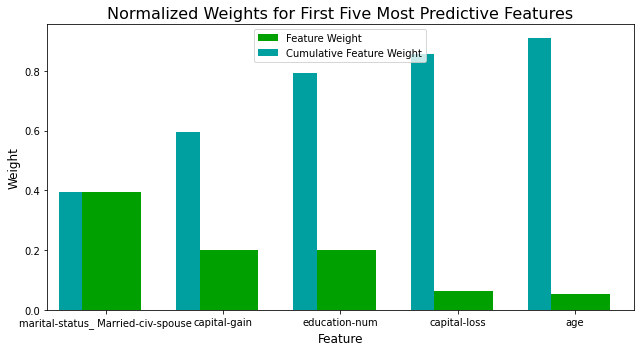

In [0]:
model = GradientBoostingClassifier().fit(X_train, y_train)

importances = model.feature_importances_

feature_plot(importances, X_train, y_train)

In [0]:
importances

array([5.42978978e-02, 1.99034858e-01, 2.00038026e-01, 6.27223555e-02,
       2.97731078e-02, 1.45114570e-03, 7.10265464e-04, 9.70029033e-05,
       8.64527757e-04, 3.70547925e-03, 4.97905885e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.65507107e-03,
       0.00000000e+00, 8.43228858e-05, 2.81554682e-04, 6.66328526e-05,
       0.00000000e+00, 6.70529700e-04, 3.93986466e-01, 1.45954508e-04,
       2.87889560e-04, 0.00000000e+00, 5.71307657e-05, 3.62587787e-05,
       0.00000000e+00, 0.00000000e+00, 1.66028552e-02, 5.11484500e-03,
       6.81679063e-04, 5.00119338e-04, 5.91179507e-03, 0.00000000e+00,
       7.90027018e-03, 5.83622399e-04, 1.23095455e-03, 9.20512923e-04,
       0.00000000e+00, 1.71696630e-03, 1.34621754e-04, 1.57742311e-04,
       1.75142256e-04, 0.00000000e+00, 3.76459720e-03, 0.00000000e+00,
      

**<h3> Extracting Feature Importance**

* The features which we guessed as important are different than what we got from model.
* The output also depends on model used as well, as the data of columns 'capital-gain', 'capital-loss' and others probably contains better indicators of income levels of the people which aids the alogorithm in defining a stronger and more accurate decision boundary.

**<h2>Feature Selection**

* We'll see how does the model performs if we only use a subset of all the available features in the data.
* With less features required to train, the expectation is that training and prediction time is much lower -- at the cost of performance metrics.
* From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data.
* This indicates that we can attempt to *reduce the feature space and simplify* the information required for the model to learn.
* Below we'll use the same chosen learning algorithm and train with training set but with only the top five important features.

In [0]:
#functionality to clone a model
from sklearn.base import clone

#selecting first five important features.
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]

X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

#train on the best model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

#make new predictions
reduced_predictions = clf.predict(X_test_reduced)

print('Final Model trained on full data\n----')
print('Accuracy on testing data : {:.4f}'.format(accuracy_score(y_test, best_predictions)))
print('F-score on testing data : {:.4f}'.format(fbeta_score(y_test, best_predictions, beta=0.5)))

print('\nFinal Model trained on Reduced data\n----')
print('Accuracy on testing data : {:.4f}'.format(accuracy_score(y_test, reduced_predictions)))
print('F-score on testing data : {:.4f}'.format(fbeta_score(y_test, reduced_predictions, beta=0.5)))


Final Model trained on full data
----
Accuracy on testing data : 0.8695
F-score on testing data : 0.7488

Final Model trained on Reduced data
----
Accuracy on testing data : 0.8588
F-score on testing data : 0.7244


**<h3> Effects of Feature Selection**

* Reducing the data to only five features also reduces the F-score and accuracy of the predtictions.
* This may be due to classifier not being able to accurately capture the complexity of the data and therefore not being able to properly generalize.
* However, if the training time was an important factor, reducing the number of features should reduce training time.
* Furthermore, since the impact on the accuracy and/or the F-scores is not too large, the small increase in classification error could be an appropriate tradeoff in this scenario.

In [0]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")
#
# Display inline matplotlib plots with IPython
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
###########################################

import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score, accuracy_score

def evaluate(results, accuracy, f1):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """
  
    # Create figure
    fig, ax = plt.subplots(2, 3, figsize = (11,7))

    # Constants
    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(3):
                
                # Creative plot code
                ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j//3, j%3].set_xlabel("Training Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    
    # Add horizontal lines for naive predictors
    ax[0, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[0, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    plt.legend(handles = patches, bbox_to_anchor = (-.80, 2.53), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # Aesthetics
    plt.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
    #plt.tight_layout()
    plt.show()

In [0]:
def feature_plot(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = plt.figure(figsize = (9,5))
    plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    plt.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(5), columns)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)
    
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()  